# PIL - Python Imaging Library

In [1]:
from PIL import Image
from pylab import *
import numpy as np
import os

%matplotlib inline

In [2]:
fig_size = [16, 9]
plt.rcParams['figure.figsize'] = fig_size

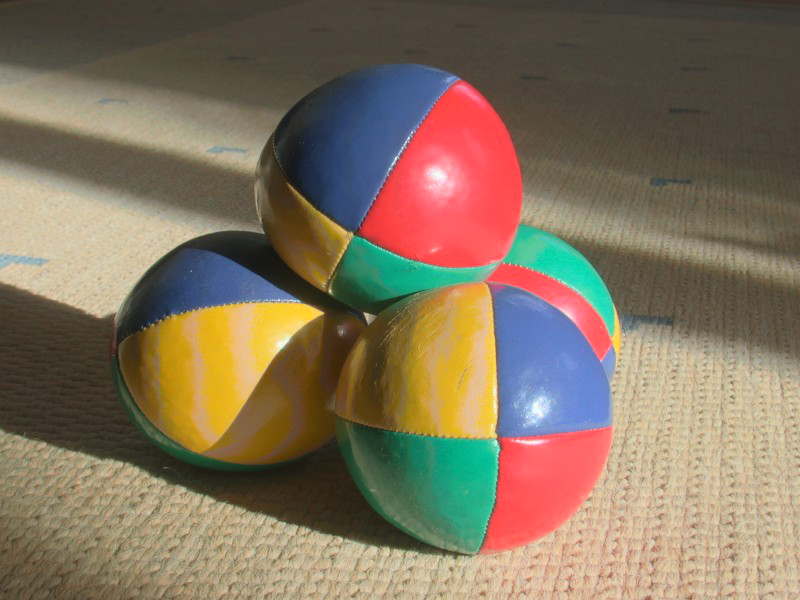

In [3]:
balls_path = '../../images/balls.jpg'
pil_im = Image.open(balls_path)
pil_im

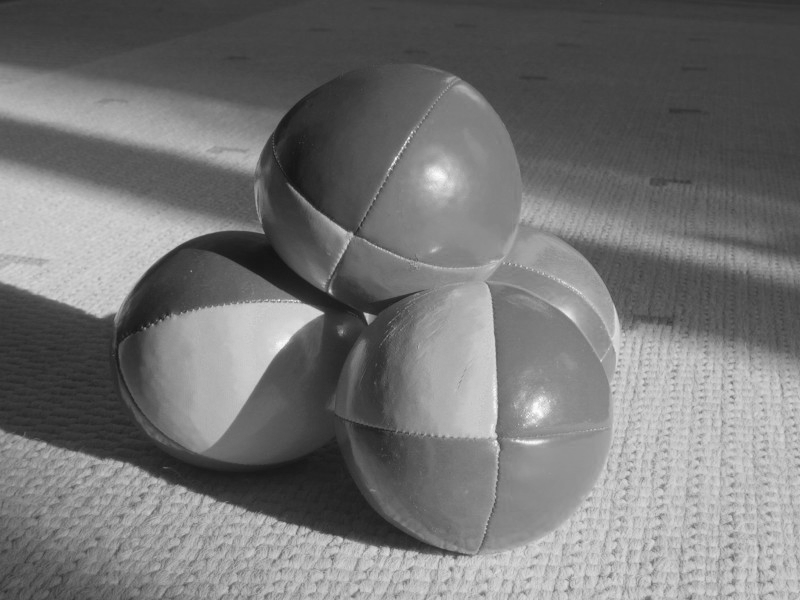

In [4]:
pil_im_grey = Image.open(balls_path).convert('L')
pil_im_grey

In [5]:
# Convert image format
Image.open('../../images/dice.png').save('../../images/dice.jpg')

# Automate for all files in directory:
#for infile in filelist:
#    outfile = os.path.splitext(infile)[0] + '.jpg'
#    if infile != outfile:
#        try:
#            Image.open(infile).save(outfile)
#        except IOError:
#            print 'Cannot convert', infile

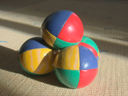

In [6]:
# Create thumbnails
pil_thumb = Image.open(balls_path)
pil_thumb.thumbnail((128, 128)) # Note: aspect ratio preserved
pil_thumb

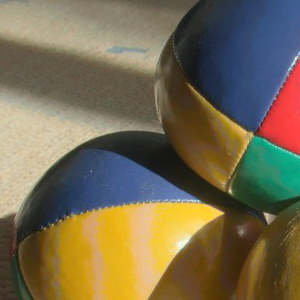

In [7]:
mask = (100, 100, 400, 400)
region = pil_im.crop(mask)
region

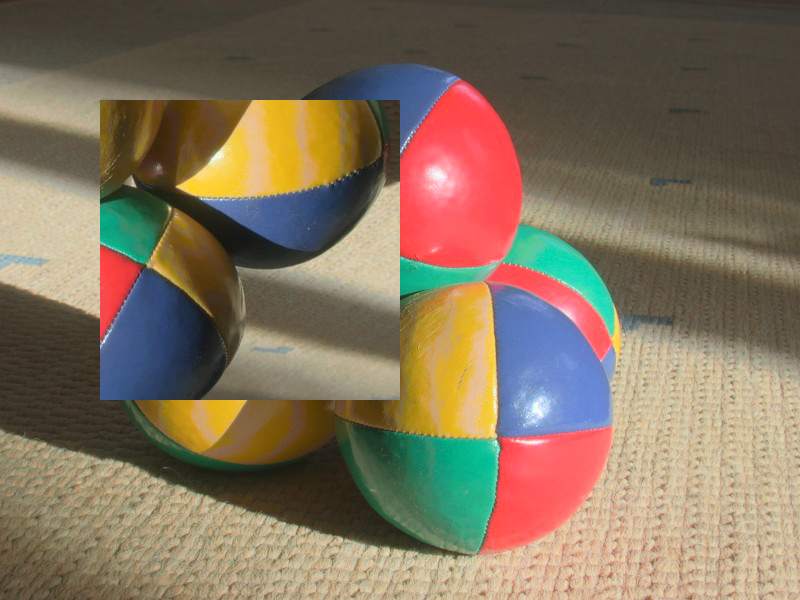

In [8]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, mask)
pil_im

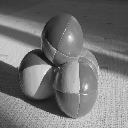

In [9]:
# Resize
grey_mini = pil_im_grey.resize((128, 128)) # Aspect ration not preserved
grey_mini

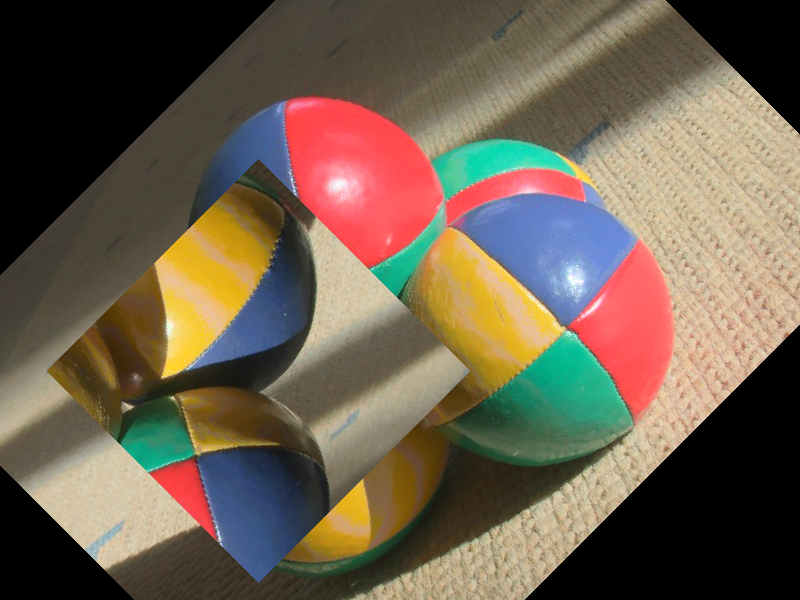

In [10]:
# Rotate
balls_45 = pil_im.rotate(45)
balls_45

# Matplotlib Integration

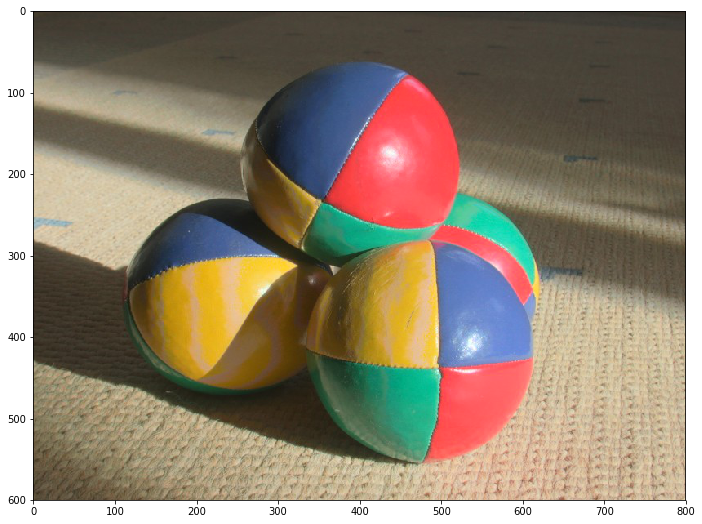

In [11]:
# Read image to array
im = array(Image.open(balls_path))
imshow(im);

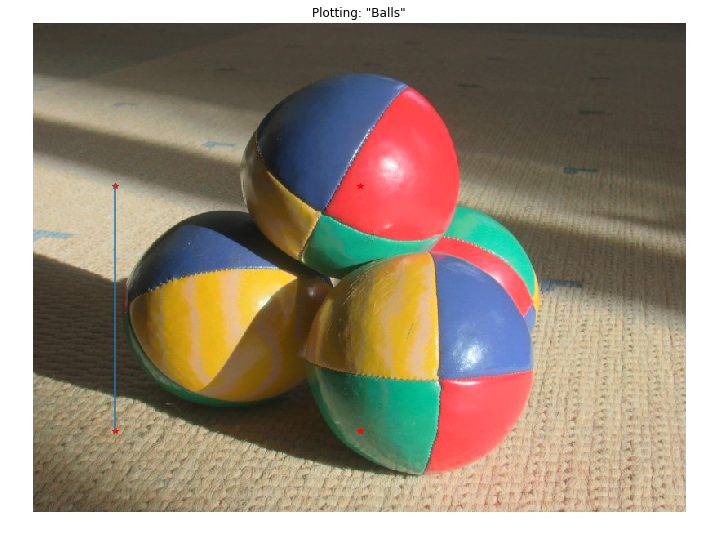

In [12]:
# Add some points
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
imshow(im);
plot(x, y, 'r*');
plot(x[:2], y[:2]);
axis('off')
title('Plotting: "Balls"');

(0.5, 799.5, 0.5, 599.5)

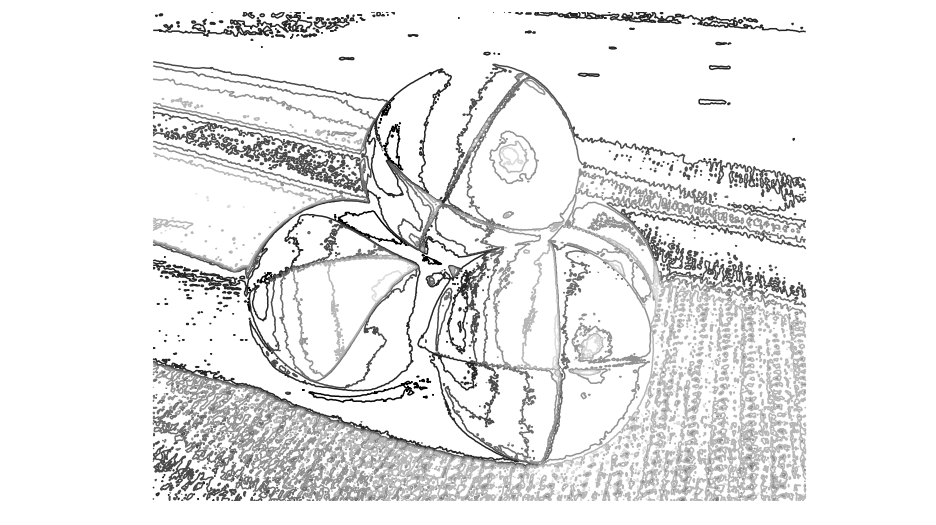

In [13]:
# Image Contours
im = array(pil_im_grey)
figure()
gray()
contour(im, origin = 'image')
axis('equal')
axis('off')

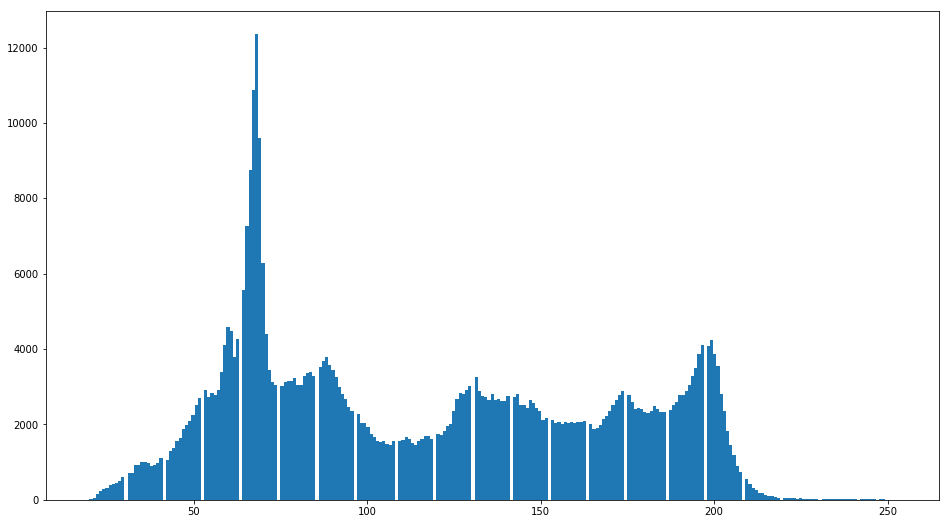

In [14]:
# Histograms
figure()
hist(im.flatten(), 255); # nbins

# NumPy

In [15]:
im = array(Image.open('../../images/balls.jpg'))
print im.shape, im.dtype

(600, 800, 3) uint8


In [16]:
im = array(Image.open('../../images/balls.jpg').convert('L'), 'f')
print im.shape, im.dtype

(600, 800) float32


# Greylevel Transforms

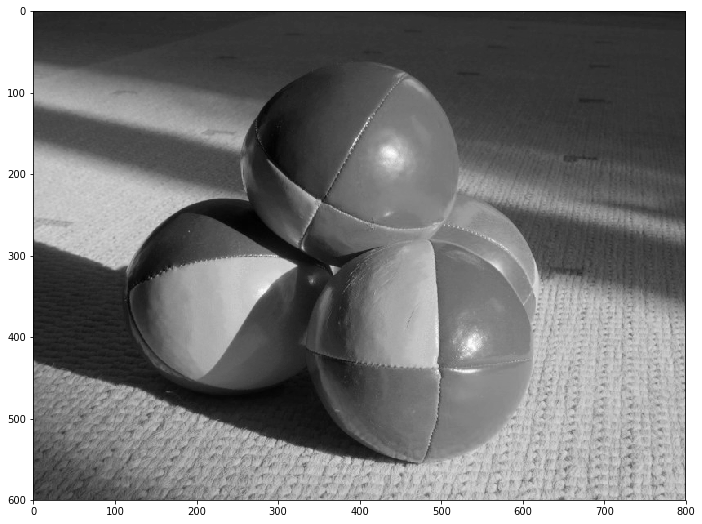

In [20]:
im = array(Image.open('../../images/balls.jpg').convert('L'))
imshow(im);

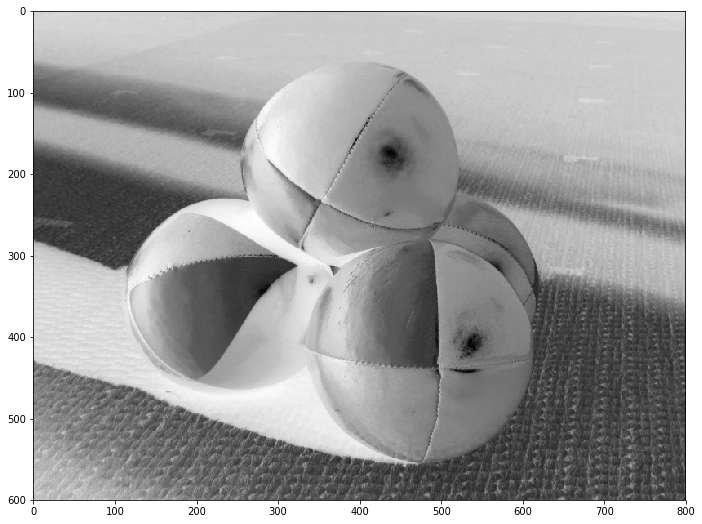

In [22]:
# Invert image:
im2 = 255 - im
imshow(im2);

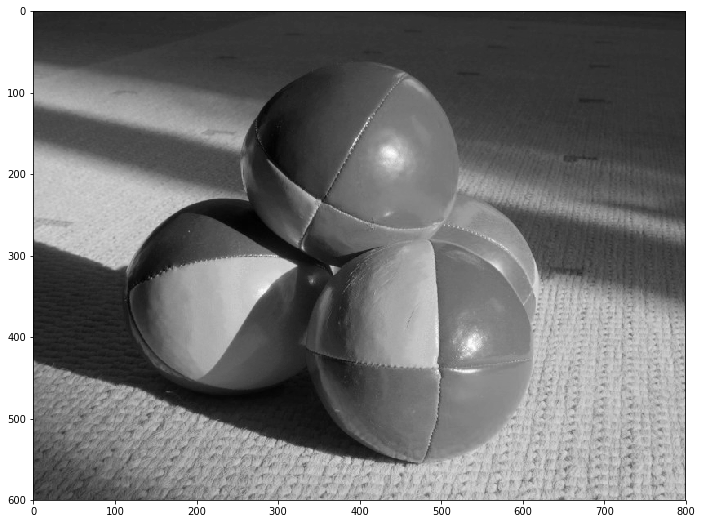

In [23]:
# Rescale to interval on [100, 200]
im3 = (100. / 355) * im + 100
imshow(im3);

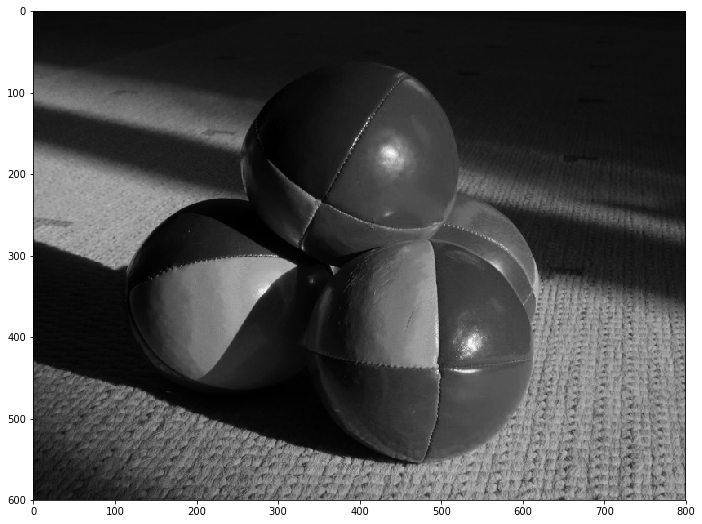

In [24]:
# Squared
im4 = 255. * (im / 255.)**2
imshow(im4);

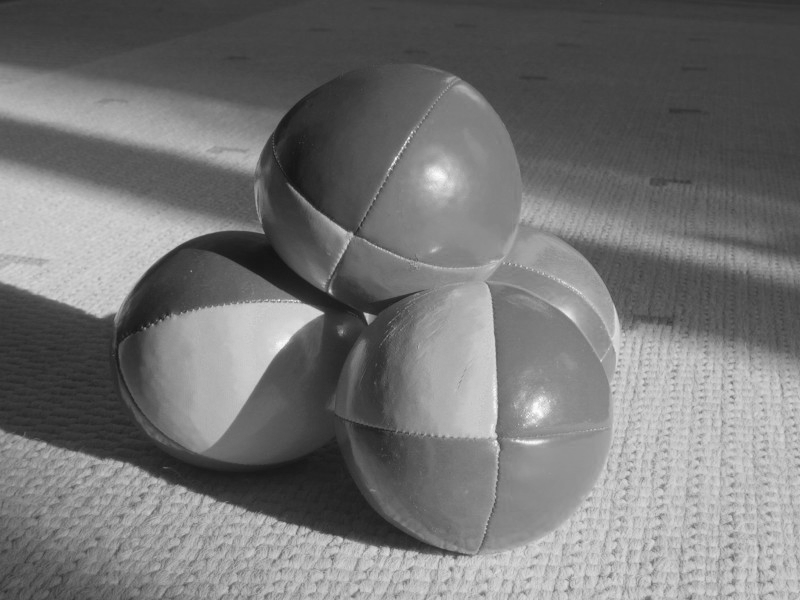

In [27]:
pil_im = Image.fromarray(im)
pil_im

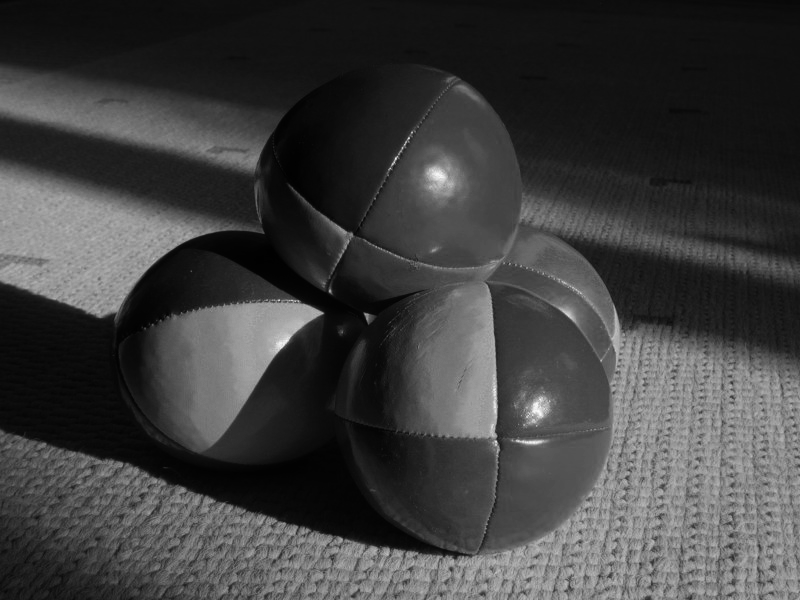

In [30]:
pil_im = Image.fromarray(uint8(im4))
pil_im

# Histogram Equalization

In [31]:
def histeq(im, nbins = 256):
    '''Histogram equalization of a greyscale image'''

    # Get histogram
    imhist, bins = histogram(im.flatten(), nbins, normed = True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1] # normalize

    # linear interpolation of cdf to find new px vals
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

In [32]:
im = array(Image.open('../../images/balls.jpg').convert('L'))
im2, cdf = histeq(im)

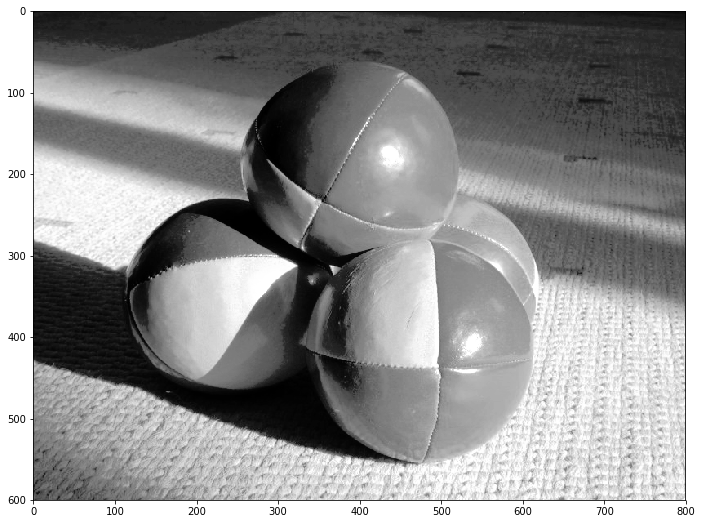

In [35]:
imshow(im2);

# SciPy